In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
used_cars_df = pd.read_csv(r'..\JNB_data\carprices.csv')

In [3]:
used_cars_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
used_cars_df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [5]:
used_cars_df.isna().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

Text(0, 0.5, 'Price')

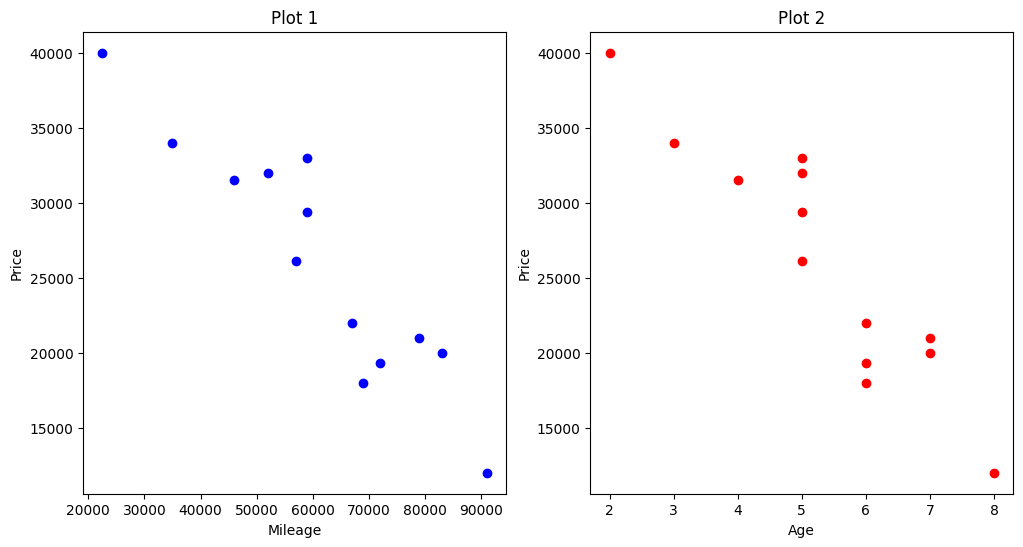

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(used_cars_df.Mileage, used_cars_df['Sell Price($)'], label='y = x^2', color='blue')
ax1.set_title('Plot 1')
ax1.set_xlabel('Mileage')
ax1.set_ylabel('Price')
ax2.scatter(used_cars_df['Age(yrs)'], used_cars_df['Sell Price($)'], label='y = x^2', color='red')
ax2.set_title('Plot 2')
ax2.set_xlabel('Age')
ax2.set_ylabel('Price')

In [18]:
# as the Mileage increases price gets reduces. and the same is true for vice versa.
#hence we can use Linear Regression ML Algorithm to predict the price for a given car

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [11]:
model = linear_model.LinearRegression()

In [12]:
X_df = pd.DataFrame(used_cars_df)

In [13]:
model.fit(X_df, used_cars_df['Sell Price($)'])

ValueError: could not convert string to float: 'BMW X5'

In [23]:
# ValueError: could not convert string to float: 'BMW X5'
# ML algorithms convert the given data into numerical features and try to predict it.
# hence its our responsbility to convert categorical features into numerical features.
# to do that we go for OHE

In [ ]:
'''
In OHE, we handle dummy variable trap.
Dummy variable trap : if you consider all the values of a given categorical column (say Red, Blue, Green), it will create 
three different linear lines(y1= mx1+c1, ...).
In this modified example, we include all three dummy variables for the "Color" variable: "Blue", "Green", and "Red".
As you can see, the coefficient for "Blue" is 10.0, for "Green" is 5.0, and for "Red" is 11.0.

Including all dummy variables without dropping any column leads to multicollinearity issues, which result in inflated coefficients. In this case, the coefficients become inflated due to the presence of highly correlated variables (dummy variables).


the "Blue" column is removed, and we fit the linear regression model with only "Green" and "Red" as predictors. The intercept is now 20.0, and the coefficients for "Green" and "Red" are -5.0 and 2.0, respectively.

These coefficient estimates indicate the expected change in the dependent variable (Price) relative to the omitted category (Blue). For example, the coefficient for "Green" (-5.0) suggests that, on average, the price is expected to decrease by $5 when the color is Green compared to Blue, holding other variables constant. Similarly, the coefficient for "Red" (2.0) suggests that, on average, the price is expected to increase by $2 when the color is Red compared to Blue, holding other variables constant

In [14]:
dummy_variables = pd.get_dummies(used_cars_df['Car Model'], drop_first=True)
df = pd.concat([used_cars_df, dummy_variables], axis='columns')

In [32]:
df

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,True,False
1,BMW X5,35000,34000,3,True,False
2,BMW X5,57000,26100,5,True,False
3,BMW X5,22500,40000,2,True,False
4,BMW X5,46000,31500,4,True,False
5,Audi A5,59000,29400,5,False,False
6,Audi A5,52000,32000,5,False,False
7,Audi A5,72000,19300,6,False,False
8,Audi A5,91000,12000,8,False,False
9,Mercedez Benz C class,67000,22000,6,False,True


In [33]:
X = df.drop(['Car Model','Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [47]:
y = df['Sell Price($)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model.fit(X_train,y_train)

LinearRegression()

In [48]:
model.score(X_test,y_test)

0.8270653658348058

In [49]:
model.predict(X_train)

array([30356.09703736, 21656.69815371, 32343.30184629, 31832.69643624,
       12389.43752684, 36078.66036926, 29177.86603693, 18531.70888793,
       24633.53370545])

In [50]:
y_train

4     31500
11    21000
12    33000
6     32000
8     12000
1     34000
5     29400
0     18000
2     26100
Name: Sell Price($), dtype: int64

In [51]:
model.predict([[86000,7,0,1]])

C:\Python_Vignesh\ML_venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19001.8677544])